# 聚类分析
---

> 聚类算法是一种无监督式算法， 即数据的类别没有被预先定义。其算法的目标是将相似数据归类到同一个簇，不相似数据划分到不同簇， 使同一簇内的对象的相似性尽可能大，而不同簇的差异性则尽可能大。

## 1. k-均值 (k-Means)聚类

> 主要使用的库
- scikit-learn
- numpy
- matplotlib

In [6]:
import numpy as np
from sklearn import datasets, cluster
import time
import matplotlib.pyplot as plt

# generate samples
numSample = 1500
randState = 170
X, y = datasets.make_blobs(numSample, random_state = randState)

In [14]:
kmeans = cluster.KMeans(3)
t0 = time.time()
yPred = kmeans.fit_predict(X)
t_batch = time.time() - t0

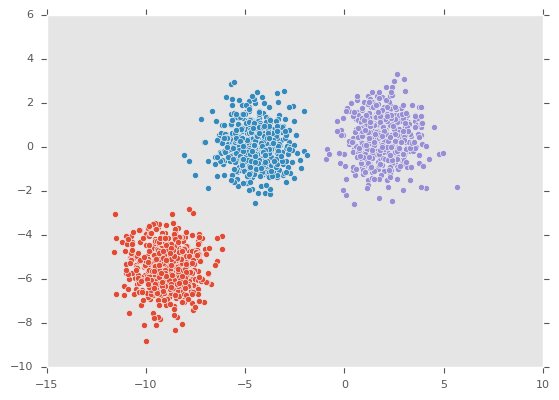

In [69]:
fig = plt.figure(111)
#colors = ['#4EACC5', '#FF9C34', '#4E9A06']
plt.style.use('ggplot')
#colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
# plt.scatter(X[:, 0], X[:, 1], c=yPred)


for k, col in zip(range(3), plt.rcParams['axes.color_cycle']):
    
    Xk = X[np.nonzero(y[:] == k)[0]]
    plt.scatter(Xk[:, 0], Xk[:, 1], c=col)
plt.grid(False)
plt.show()

## KMeans算法的具体实现
---

In [117]:
'''
k-means clustering
'''

import numpy as np
import matplotlib.pyplot as plt
import math

# load dataSet
def loadDataSet(filename):
    file = open(filename)
    dataList = []
    for line in file.readlines():
        lineList = line.strip().split('\t')
        fltline = map(float, lineList)
        dataList.append(fltline)
    dataMat = np.mat(dataList)
    return dataMat

# calculate Eclud distance
def distEclud(vecA, vecB):
    diff = vecA - vecB
    diffSum = np.sum(np.power(diff, 2))
    return np.sqrt(diffSum)

# rand pick k-points in the range of dataSet as the centroids
def randCent(dataMat, k):
    n = np.shape(dataMat)[1]
    centroids = np.mat(np.zeros((k, n)))
    for j in range(n):
        minJ = np.min(dataMat[:, j])
        maxJ = np.max(dataMat[:, j])
        rangeJ = float((maxJ - minJ))
        centroids[:, j] = np.mat(minJ + rangeJ * np.random.rand(k, 1))
    return centroids

In [118]:
# k-means algorithm
def kMeans(dataMat, k, distMeas = distEclud, createCent = randCent):
    m = np.shape(dataMat)[0]
    centroids = createCent(dataMat, k)
    clusterChanged = True
    clusterAsses = np.mat(np.zeros((m, 2)))
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            mindist = np.inf
            minIndex = -1
            for j in range(k):
                dist = distMeas(dataMat[i, :], centroids[j, :])
                if dist < mindist:
                    mindist = dist
                    minIndex = j
            if clusterAsses[i, 0] != minIndex:
                clusterChanged = True
            clusterAsses[i, :] = minIndex, mindist ** 2
        for cent in range(k):
            pointsInClus = dataMat[np.nonzero(clusterAsses[:, 0] == cent)[0]]
            centroids[cent, :] = pointsInClus.mean(axis=0)
    return centroids, clusterAsses

In [119]:
# testing the kMeans algorithm
dataMat = loadDataSet('testSet.txt')
dataMat = np.mat(dataMat)
centroids, clusterAsses = kMeans(dataMat, 4)
print 'centroids i:\n ', centroids

centroids i:
  [[ 2.6265299   3.10868015]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]
 [-3.38237045 -2.9473363 ]]


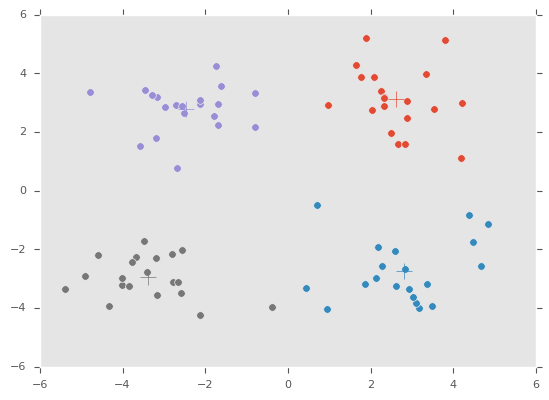

In [120]:
fig = plt.figure()
plt.style.use('ggplot')
for k, col in zip(range(4), plt.rcParams['axes.color_cycle']):
    
    X = dataMat[np.nonzero(clusterAsses[:, 0] == k)[0]]
    plt.scatter(X[:, 0], X[:, 1],s=30, c=col)
    plt.scatter(centroids[k, 0], centroids[k, 1], s=120, c=col, marker='+')
plt.grid(False)
plt.show()

In [129]:
print dataMat.shape[0]

80
